In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
path = "./data/IMDB-Movie-Data.csv"

In [8]:
df = pd.read_csv(path)

In [12]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# 我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [16]:
df["Rating"].mean()

6.723199999999999

In [26]:
np.unique(df["Director"]).shape[0]

644

In [30]:
df["Director"].unique().shape[0]

644

# 对于这一组电影数据，如果我们想Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

<Axes: ylabel='Frequency'>

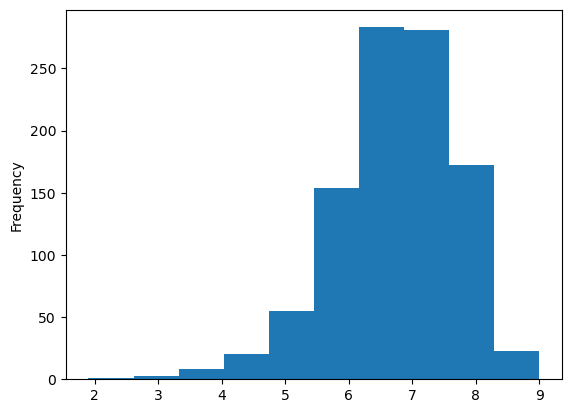

In [34]:
df["Rating"].plot(kind = "hist")

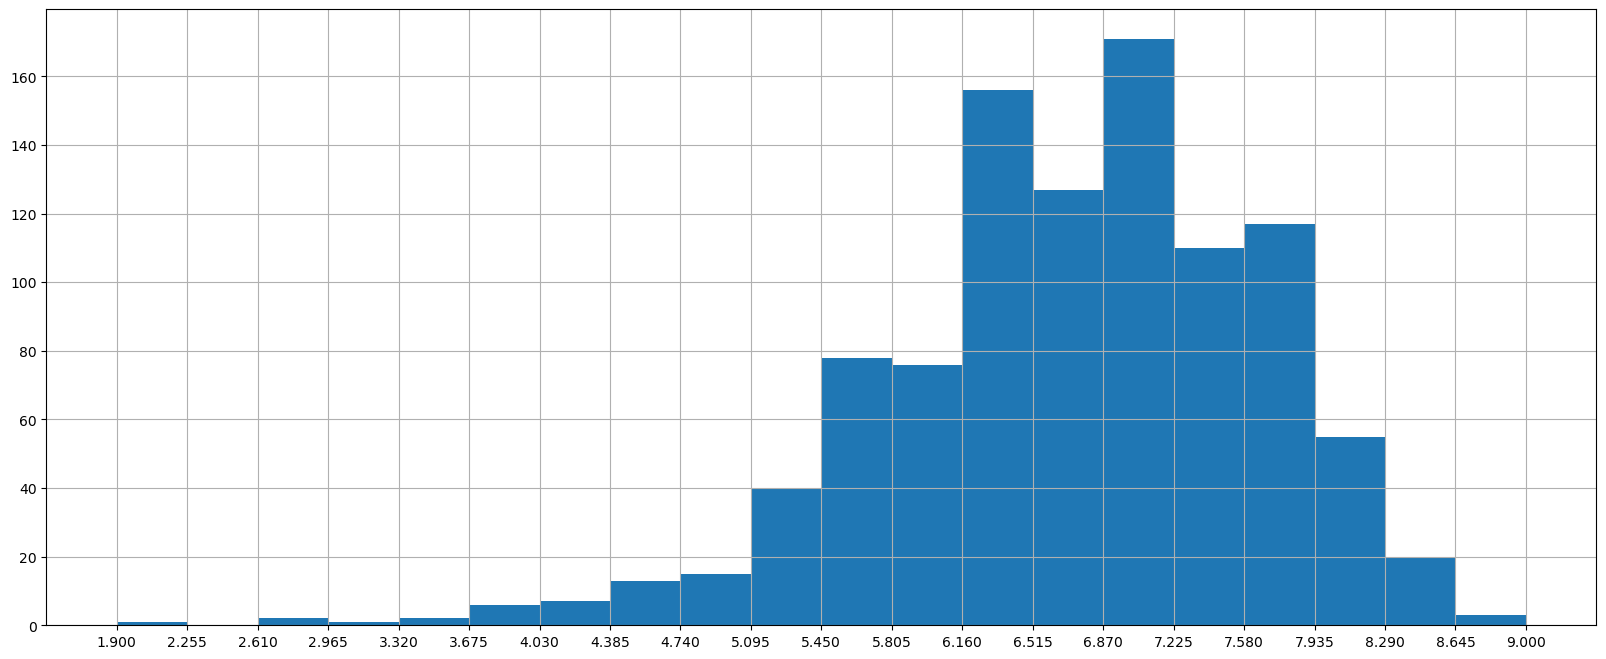

In [53]:
# 1.创建画布
plt.figure(figsize=(20,8),dpi=(100))
# 2.绘制图像
plt.hist(df["Rating"].values,bins=20)

# 2.1添加刻度
max_ = df["Rating"].max()
min_ = df["Rating"].min()

t1 = np.linspace(min_,max_,num =21)

plt.xticks(t1)

# 2.2 添加网格
plt.grid()

# 3.显示
plt.show()

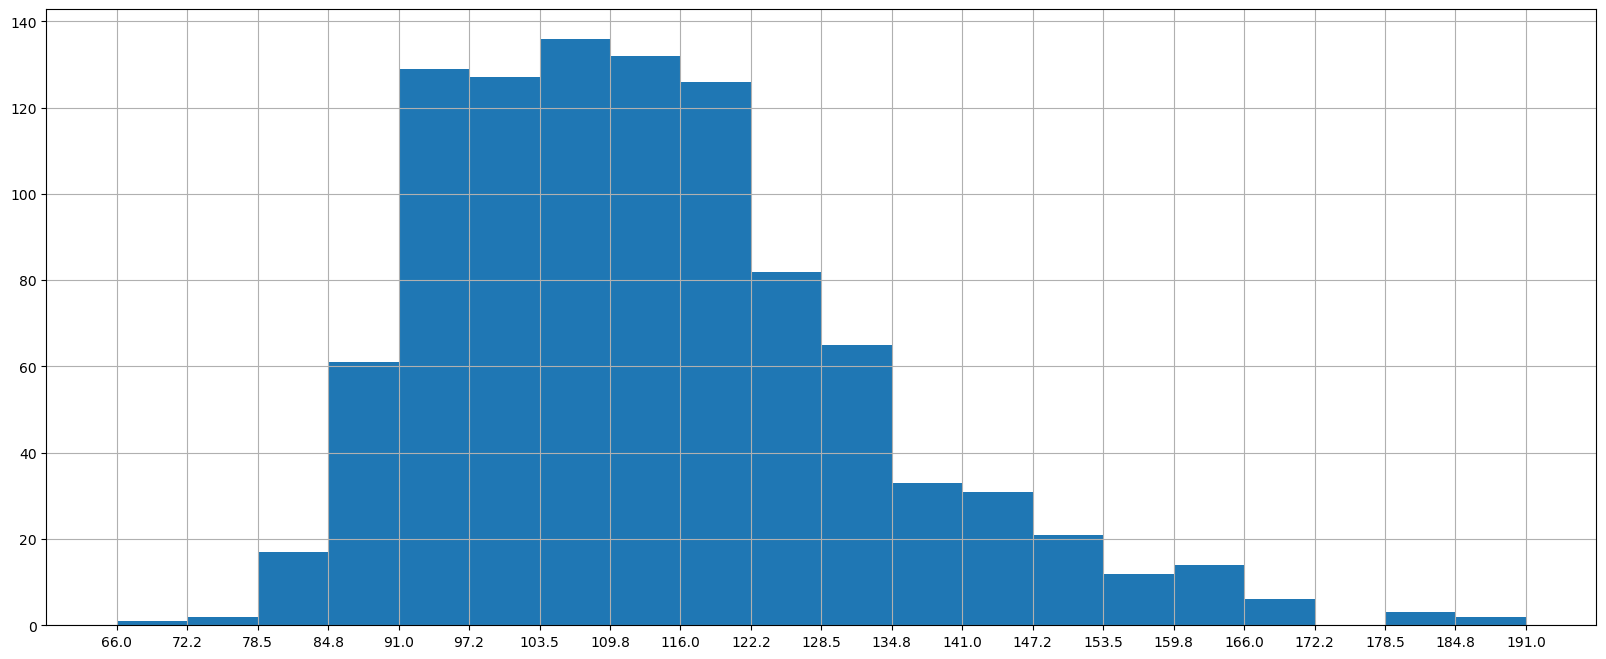

In [57]:
# Runtime (Minutes)分布

# 1.创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 2.绘制图像
plt.hist(df["Runtime (Minutes)"].values, bins=20)

# 2.1 添加刻度
max_ = df["Runtime (Minutes)"].max()
min_ = df["Runtime (Minutes)"].min()

t1 = np.linspace(min_, max_, num=21)

plt.xticks(t1)

# 2.2 添加网格
plt.grid()

# 3.显示
plt.show()

# 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [68]:
#
temp_list = [i.split(",") for i in df["Genre"]]

In [84]:
genre_list = np.unique([i for j in temp_list for i in j])

In [92]:
zeros = np.zeros([df.shape[0],genre_list.shape[0]])

In [96]:
temp_movies = pd.DataFrame(zeros,columns=genre_list)

In [100]:
temp_movies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
for i in range(1000):
    temp_movies.loc[i,temp_list[i]]=1

In [111]:
#temp_movies.loc[i,1]

0.0

In [115]:
#temp_list[1]

['Adventure', 'Mystery', 'Sci-Fi']

In [119]:
temp_movies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
genre = temp_movies.sum().sort_values(ascending = False)
genre

Drama        513.0
Action       303.0
Comedy       279.0
Adventure    259.0
Thriller     195.0
Crime        150.0
Romance      141.0
Sci-Fi       120.0
Horror       119.0
Mystery      106.0
Fantasy      101.0
Biography     81.0
Family        51.0
Animation     49.0
History       29.0
Sport         18.0
Music         16.0
War           13.0
Western        7.0
Musical        5.0
dtype: float64

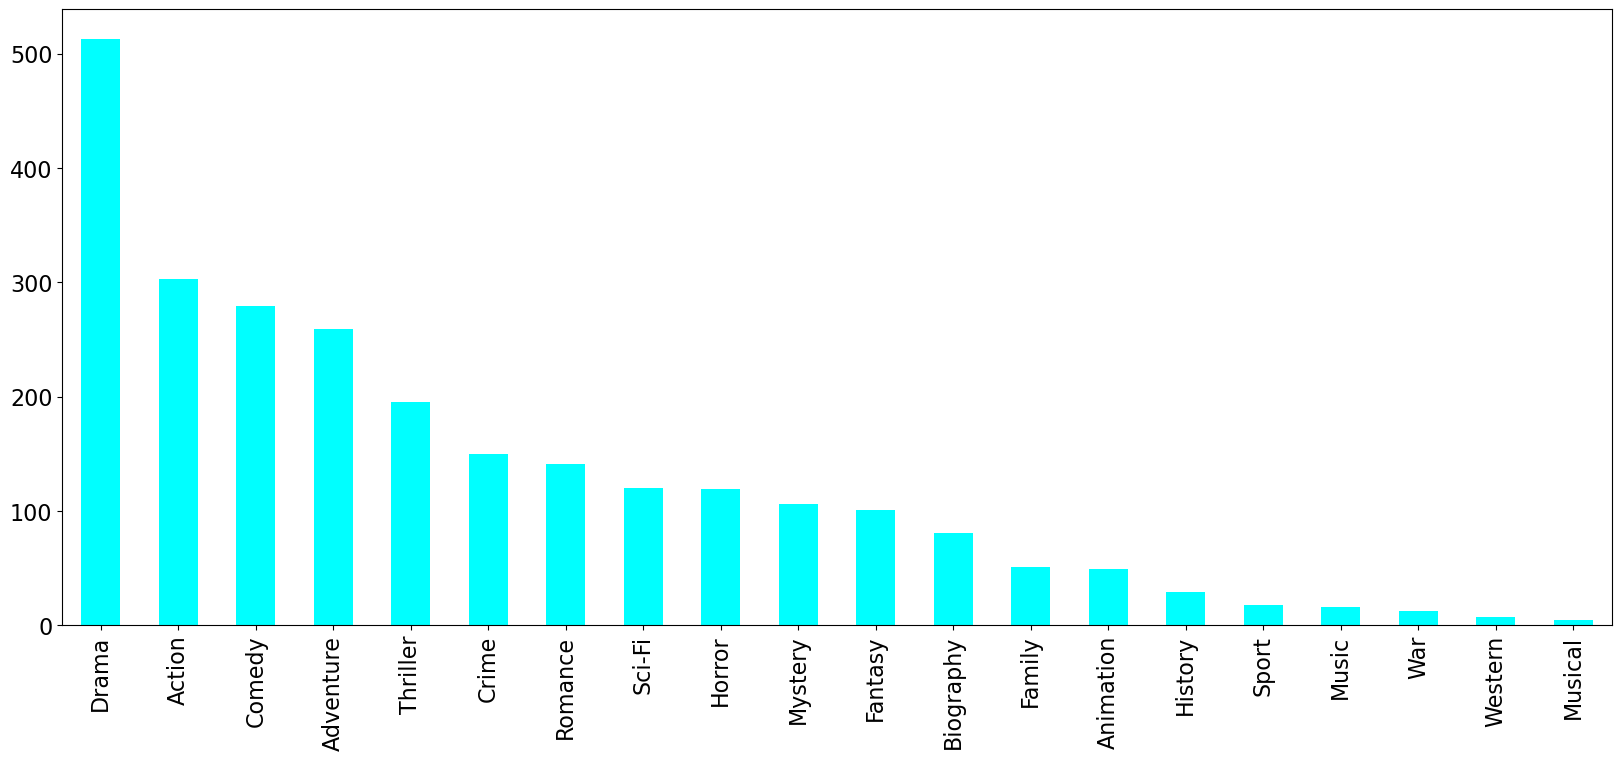

In [150]:
genre.plot(kind = "bar",colormap="cool",figsize=(20,8),fontsize=16)
plt.show()